# Generate Random Coordinates of World Cities

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

# Retrieve, Collect, and Clean Weather Data

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | vestmanna
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | korla
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | san quintin
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | diego de almagro
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | kieta
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | superior
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | nara
Processing Record 20 of Set 1 | emerald
Processing Record 21 of Set 1 | farah
Processing Record 22 of Set 1 | kismayo
Processing Record 23 of Set 1 | kodiak
Processin

Processing Record 38 of Set 4 | coquimbo
Processing Record 39 of Set 4 | bethel
Processing Record 40 of Set 4 | eldikan
City not found. Skipping...
Processing Record 41 of Set 4 | srivardhan
Processing Record 42 of Set 4 | berlevag
Processing Record 43 of Set 4 | hunza
City not found. Skipping...
Processing Record 44 of Set 4 | yar-sale
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | guiyang
Processing Record 49 of Set 4 | zhaozhou
Processing Record 50 of Set 4 | alvdal
Processing Record 1 of Set 5 | yomitan
City not found. Skipping...
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | lasa
Processing Record 4 of Set 5 | hasaki
Processing Record 5 of Set 5 | solnechnyy
Processing Record 6 of Set 5 | lagoa
Processing Record 7 of Set 5 | sabang
Processing Record 8 of Set 5 | bambous virieux
Processing Record 9 of Set 5 | umt

Processing Record 26 of Set 8 | karratha
Processing Record 27 of Set 8 | muzaffarnagar
Processing Record 28 of Set 8 | bacalar
Processing Record 29 of Set 8 | kijang
Processing Record 30 of Set 8 | jabiru
City not found. Skipping...
Processing Record 31 of Set 8 | pietarsaari
Processing Record 32 of Set 8 | sur
Processing Record 33 of Set 8 | anloga
Processing Record 34 of Set 8 | tiko
Processing Record 35 of Set 8 | kungsbacka
Processing Record 36 of Set 8 | yeppoon
Processing Record 37 of Set 8 | umm kaddadah
Processing Record 38 of Set 8 | mbandaka
Processing Record 39 of Set 8 | aripuana
Processing Record 40 of Set 8 | pocatello
Processing Record 41 of Set 8 | honningsvag
Processing Record 42 of Set 8 | consuegra
Processing Record 43 of Set 8 | wajir
Processing Record 44 of Set 8 | caravelas
Processing Record 45 of Set 8 | jomalig
City not found. Skipping...
Processing Record 46 of Set 8 | yerbogachen
Processing Record 47 of Set 8 | angoche
Processing Record 48 of Set 8 | ostersund

Processing Record 16 of Set 12 | erzin
Processing Record 17 of Set 12 | columbia
Processing Record 18 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 19 of Set 12 | banda aceh
Processing Record 20 of Set 12 | garm
City not found. Skipping...
Processing Record 21 of Set 12 | shingu
Processing Record 22 of Set 12 | pando
Processing Record 23 of Set 12 | berberati
Processing Record 24 of Set 12 | gorontalo
Processing Record 25 of Set 12 | mogadishu
Processing Record 26 of Set 12 | genhe
Processing Record 27 of Set 12 | panguma
Processing Record 28 of Set 12 | ushtobe
Processing Record 29 of Set 12 | tidore
City not found. Skipping...
Processing Record 30 of Set 12 | olinda
Processing Record 31 of Set 12 | colares
Processing Record 32 of Set 12 | kalmunai
Processing Record 33 of Set 12 | betioky
Processing Record 34 of Set 12 | iwanai
Processing Record 35 of Set 12 | sipe sipe
Processing Record 36 of Set 12 | bucerias
Processing Record 37 of Set 12 | cubuk
Processing R

In [10]:
# Check that we have at least 500 cities
len(city_data)

579

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,51.26,77,100,26.37,NZ,2022-05-21 21:29:01
1,Severo-Kurilsk,50.6789,156.1250,42.80,94,97,3.56,RU,2022-05-21 21:29:01
2,Vestmanna,62.1564,-7.1664,47.32,93,100,8.05,FO,2022-05-21 21:29:02
3,Iqaluit,63.7506,-68.5145,31.73,80,100,29.93,CA,2022-05-21 21:25:49
4,Korla,41.7597,86.1469,77.86,12,100,17.49,CN,2022-05-21 21:29:02
5,Thompson,55.7435,-97.8558,51.96,24,20,13.80,CA,2022-05-21 21:29:03
6,San Quintin,30.4833,-115.9500,65.05,58,0,11.10,MX,2022-05-21 21:29:03
7,Mataura,-46.1927,168.8643,45.79,96,100,9.53,NZ,2022-05-21 21:29:04
8,Diego De Almagro,-26.3667,-70.0500,71.80,23,0,7.65,CL,2022-05-21 21:29:04
9,Dikson,73.5069,80.5464,25.11,96,94,7.36,RU,2022-05-21 21:29:04


In [14]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-05-21 21:29:01,-46.6000,168.3333,51.26,77,100,26.37
1,Severo-Kurilsk,RU,2022-05-21 21:29:01,50.6789,156.1250,42.80,94,97,3.56
2,Vestmanna,FO,2022-05-21 21:29:02,62.1564,-7.1664,47.32,93,100,8.05
3,Iqaluit,CA,2022-05-21 21:25:49,63.7506,-68.5145,31.73,80,100,29.93
4,Korla,CN,2022-05-21 21:29:02,41.7597,86.1469,77.86,12,100,17.49
5,Thompson,CA,2022-05-21 21:29:03,55.7435,-97.8558,51.96,24,20,13.80
6,San Quintin,MX,2022-05-21 21:29:03,30.4833,-115.9500,65.05,58,0,11.10
7,Mataura,NZ,2022-05-21 21:29:04,-46.1927,168.8643,45.79,96,100,9.53
8,Diego De Almagro,CL,2022-05-21 21:29:04,-26.3667,-70.0500,71.80,23,0,7.65
9,Dikson,RU,2022-05-21 21:29:04,73.5069,80.5464,25.11,96,94,7.36


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Weather Data

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

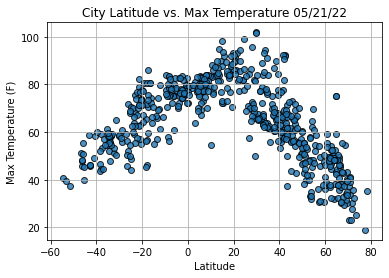

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

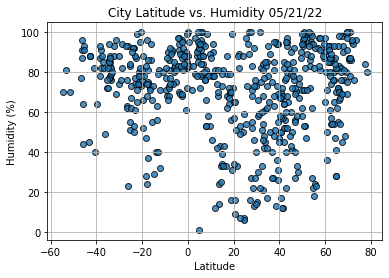

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

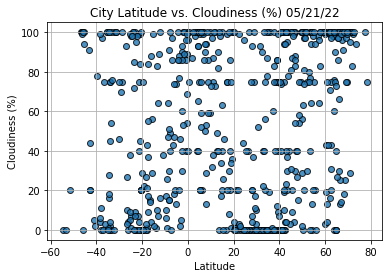

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

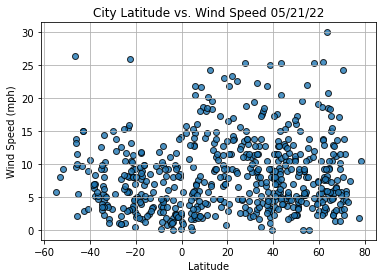

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Determine Correlations

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

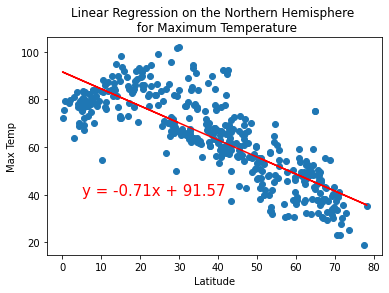

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,40))

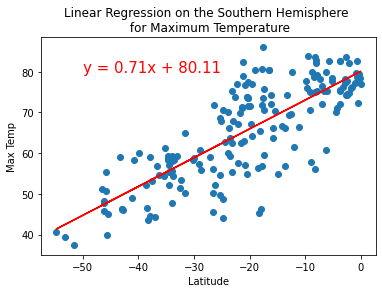

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

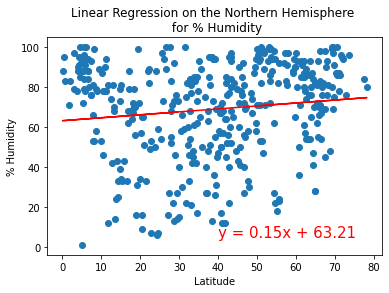

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,5))

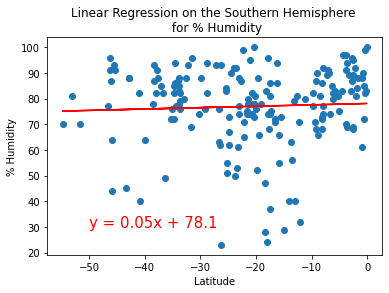

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

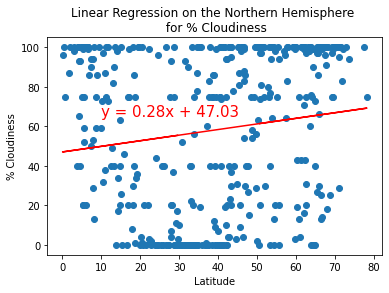

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,65))

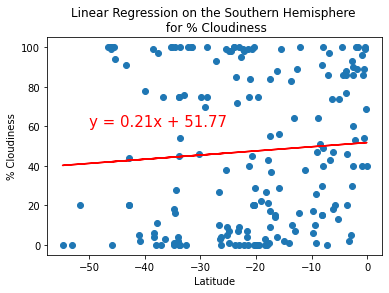

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

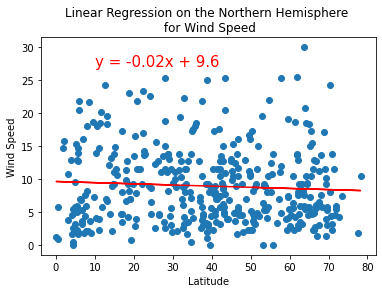

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,27))

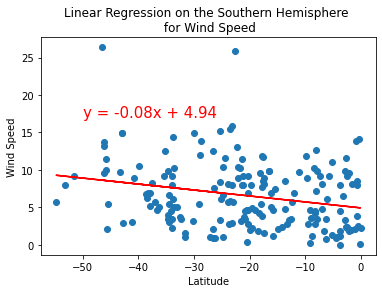

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,17))